# 📊 Análise de Perfis de Espessura Epitelial
## Clusterização K-Means - Metodologia KDD

---

### 🎯 Objetivo
Descobrir **perfis de espessura epitelial** em mapas oculares usando aprendizado não-supervisionado (K-Means).

### 📚 Metodologia: KDD (Knowledge Discovery in Databases)
1. **Seleção de Dados**: Escolher variáveis relevantes
2. **Pré-processamento**: Limpeza e tratamento de dados
3. **Transformação**: Normalização e preparação
4. **Mineração de Dados**: Aplicação do algoritmo K-Means
5. **Interpretação/Avaliação**: Análise dos resultados

### 📐 Regiões Anatômicas
```
┌────┬────┬────┐
│ ST │ S  │ SN │  ST = Superior Temporal
├────┼────┼────┤  S  = Superior
│ T  │ C  │ N  │  SN = Superior Nasal
├────┼────┼────┤  C  = Central
│ IT │ I  │ IN │  ...
└────┴────┴────┘
```

In [1]:
# Importar bibliotecas necessárias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
import warnings
warnings.filterwarnings('ignore')

# Configurar estilo dos gráficos
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

# Importar módulos do projeto
from kmeans_clustering import KMeansEpithelialClusterer
from optimization import KOptimizer
from presentation import ClientPresentation

print("✅ Bibliotecas importadas com sucesso!")
print(f"📦 Versões: pandas={pd.__version__}, numpy={np.__version__}")

✅ Bibliotecas importadas com sucesso!
📦 Versões: pandas=2.3.3, numpy=2.3.3


---
## 1️⃣ KDD Etapa 1: SELEÇÃO DE DADOS

Carregamento e seleção das variáveis relevantes para análise.

In [2]:
# Carregar dataset
filepath = 'data/RTVue_20221110_MLClass.csv'
df_original = pd.read_csv(filepath)

print("=" * 70)
print("KDD ETAPA 1: SELEÇÃO DE DADOS")
print("=" * 70)
print(f"\n📊 Shape do dataset: {df_original.shape}")
print(f"\n📋 Colunas disponíveis:\n{df_original.columns.tolist()}")

# Visualizar primeiras linhas
print("\n👀 Primeiras 5 linhas:")
df_original.head()

KDD ETAPA 1: SELEÇÃO DE DADOS

📊 Shape do dataset: (5972, 14)

📋 Colunas disponíveis:
['Index', 'pID', 'Age', 'Gender', 'Eye', 'C', 'S', 'ST', 'T', 'IT', 'I', 'IN', 'N', 'SN']

👀 Primeiras 5 linhas:


Index   pID  Age Gender Eye     C     S    ST     T    IT     I    IN  \
0      0  6269   22      F  OS  50.0  56.0  60.0  71.0  57.0  54.0  52.0   
1      2  6270   33      F  OS  56.0  55.0  54.0  54.0  55.0  56.0  56.0   
2      4  6274   34      F  OS  58.0  69.0  55.0  57.0  67.0  72.0  66.0   
3      7  6277   12      M  OS  47.0  52.0  52.0  47.0  46.0  48.0  55.0   
4      9  6278   25      M  OS  53.0  52.0  51.0  52.0  54.0  55.0  54.0   

      N    SN  
0  52.0  51.0  
1  55.0  55.0  
2  59.0  64.0  
3  56.0  53.0  
4  53.0  53.0

In [3]:
# Informações gerais do dataset
print("📊 Informações do Dataset:\n")
df_original.info()

print("\n📈 Estatísticas Descritivas:\n")
df_original.describe().round(2)

📊 Informações do Dataset:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5972 entries, 0 to 5971
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Index   5972 non-null   int64  
 1   pID     5972 non-null   int64  
 2   Age     5972 non-null   int64  
 3   Gender  5972 non-null   object 
 4   Eye     5972 non-null   object 
 5   C       5658 non-null   float64
 6   S       5850 non-null   float64
 7   ST      5841 non-null   float64
 8   T       5831 non-null   float64
 9   IT      5829 non-null   float64
 10  I       5807 non-null   float64
 11  IN      5838 non-null   float64
 12  N       5844 non-null   float64
 13  SN      5850 non-null   float64
dtypes: float64(9), int64(3), object(2)
memory usage: 653.3+ KB

📈 Estatísticas Descritivas:



Index      pID      Age        C        S       ST        T       IT  \
count  5972.00  5972.00  5972.00  5658.00  5850.00  5841.00  5831.00  5829.00   
mean   3256.18  3243.09    39.28    53.01    55.03    52.70    52.28    53.67   
std    1856.74  2421.50    40.51    19.87   134.80    16.77    16.82    65.37   
min       0.00    82.00     0.00     0.00     0.00     0.00     0.00     0.00   
25%    1682.75   832.50    25.00    49.00    49.00    49.00    48.00    49.00   
50%    3298.50  4099.00    34.00    53.00    52.00    52.00    52.00    52.00   
75%    4853.25  5507.00    50.00    56.00    57.00    56.00    56.00    57.00   
max    6424.00  6956.00  2019.00   770.00  7318.00   739.00   776.00  4848.00   

             I       IN        N       SN  
count  5807.00  5838.00  5844.00  5850.00  
mean     54.22    54.26    54.14    53.72  
std      24.09    20.57    33.43    51.24  
min       0.00     0.00     0.00     0.00  
25%      50.00    51.00    50.00    50.00  
50%      54.00    54.00    54.00    53.00  
75%      58.00    58.00    57.00    57.00  
max     849.00   893.00  2310.00  3801.00

In [4]:
# Selecionar apenas as variáveis de espessura epitelial
features = ['C', 'S', 'ST', 'T', 'IT', 'I', 'IN', 'N', 'SN']

print("\n✅ Variáveis selecionadas para análise:")
for i, feature in enumerate(features, 1):
    print(f"  {i}. {feature}")

print(f"\n📊 Total de variáveis: {len(features)}")


✅ Variáveis selecionadas para análise:
  1. C
  2. S
  3. ST
  4. T
  5. IT
  6. I
  7. IN
  8. N
  9. SN

📊 Total de variáveis: 9


---
## 2️⃣ KDD Etapa 2: PRÉ-PROCESSAMENTO

Limpeza dos dados e tratamento de valores ausentes.

In [5]:
print("=" * 70)
print("KDD ETAPA 2: PRÉ-PROCESSAMENTO")
print("=" * 70)

# Verificar valores ausentes
print("\n🔍 Valores ausentes por coluna:")
missing = df_original[features].isnull().sum()
missing_pct = (missing / len(df_original) * 100).round(2)
missing_df = pd.DataFrame({
    'Coluna': missing.index,
    'Valores Ausentes': missing.values,
    'Percentual (%)': missing_pct.values
})
print(missing_df.to_string(index=False))

# Remover linhas com valores ausentes
initial_count = len(df_original)
df_clean = df_original[features].dropna()
removed_count = initial_count - len(df_clean)

print(f"\n📊 Registros iniciais: {initial_count}")
print(f"❌ Registros removidos: {removed_count} ({removed_count/initial_count*100:.2f}%)")
print(f"✅ Registros restantes: {len(df_clean)}")

KDD ETAPA 2: PRÉ-PROCESSAMENTO

🔍 Valores ausentes por coluna:
Coluna  Valores Ausentes  Percentual (%)
     C               314            5.26
     S               122            2.04
    ST               131            2.19
     T               141            2.36
    IT               143            2.39
     I               165            2.76
    IN               134            2.24
     N               128            2.14
    SN               122            2.04

📊 Registros iniciais: 5972
❌ Registros removidos: 685 (11.47%)
✅ Registros restantes: 5287


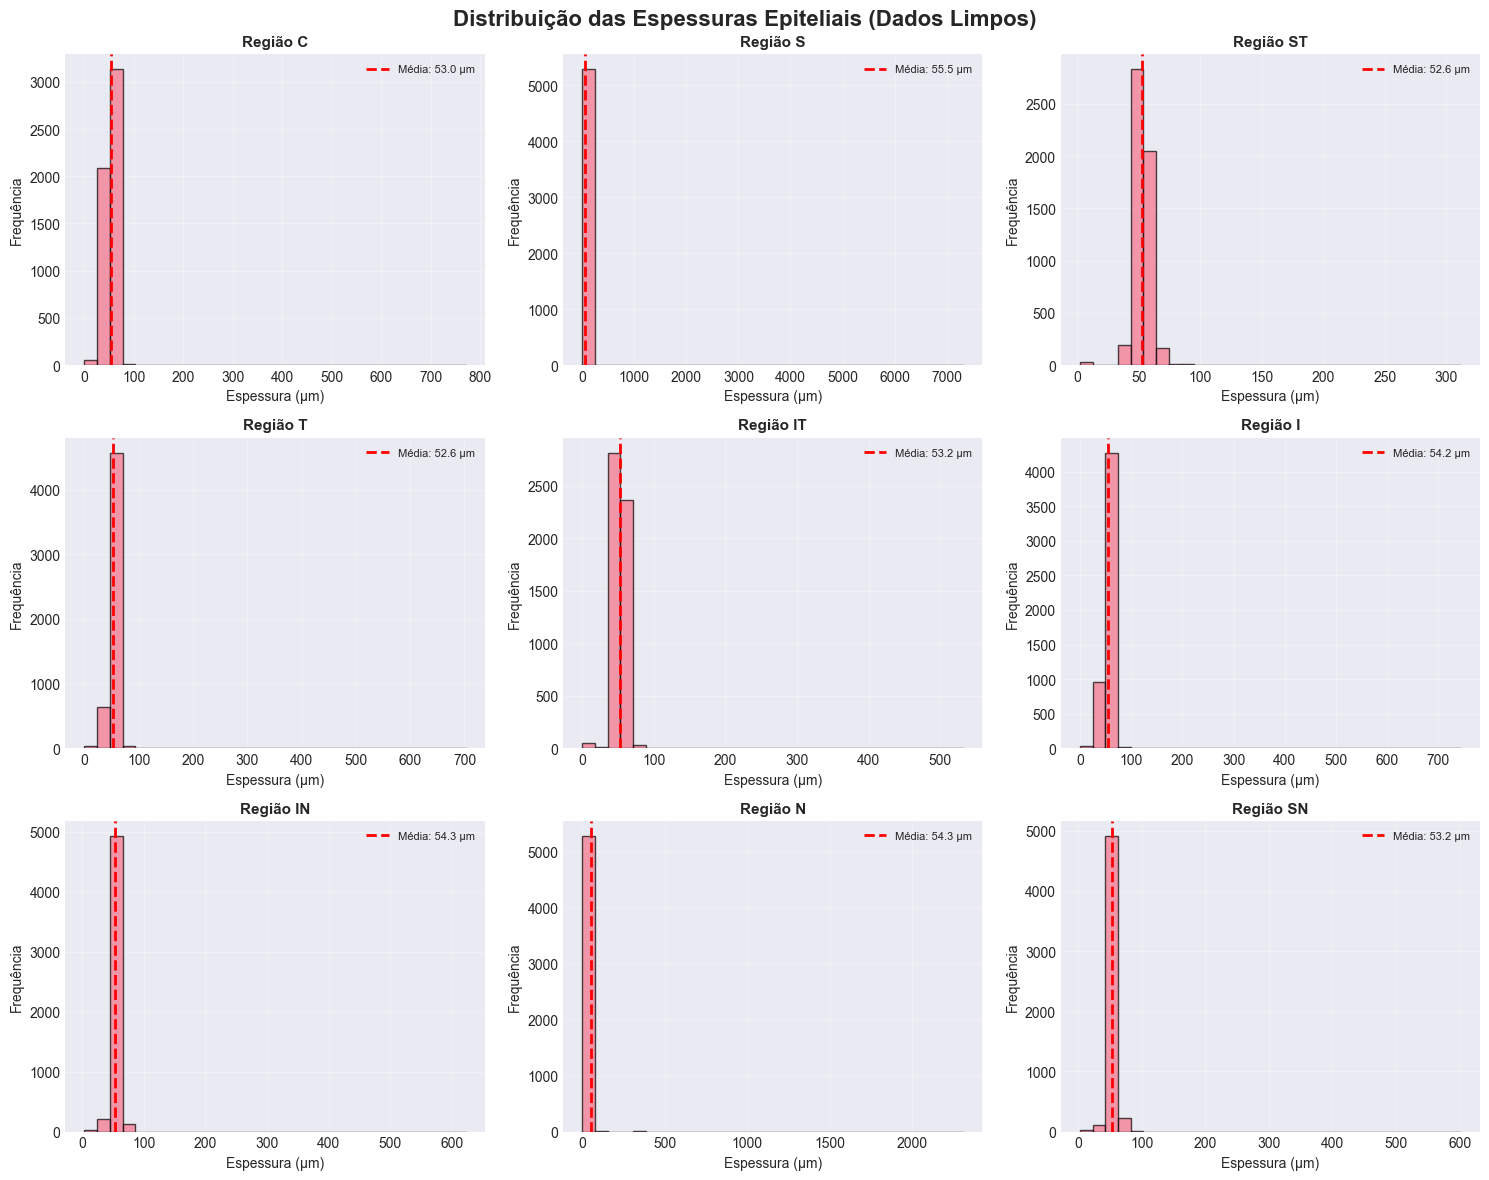


✅ Distribuições visualizadas!


In [6]:
# Visualizar distribuições após limpeza
fig, axes = plt.subplots(3, 3, figsize=(15, 12))
fig.suptitle('Distribuição das Espessuras Epiteliais (Dados Limpos)', 
             fontsize=16, fontweight='bold')

for idx, feature in enumerate(features):
    ax = axes[idx // 3, idx % 3]
    ax.hist(df_clean[feature], bins=30, edgecolor='black', alpha=0.7)
    ax.axvline(df_clean[feature].mean(), color='red', linestyle='--', linewidth=2, 
               label=f'Média: {df_clean[feature].mean():.1f} μm')
    ax.set_xlabel('Espessura (μm)', fontsize=10)
    ax.set_ylabel('Frequência', fontsize=10)
    ax.set_title(f'Região {feature}', fontsize=11, fontweight='bold')
    ax.legend(fontsize=8)
    ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\n✅ Distribuições visualizadas!")

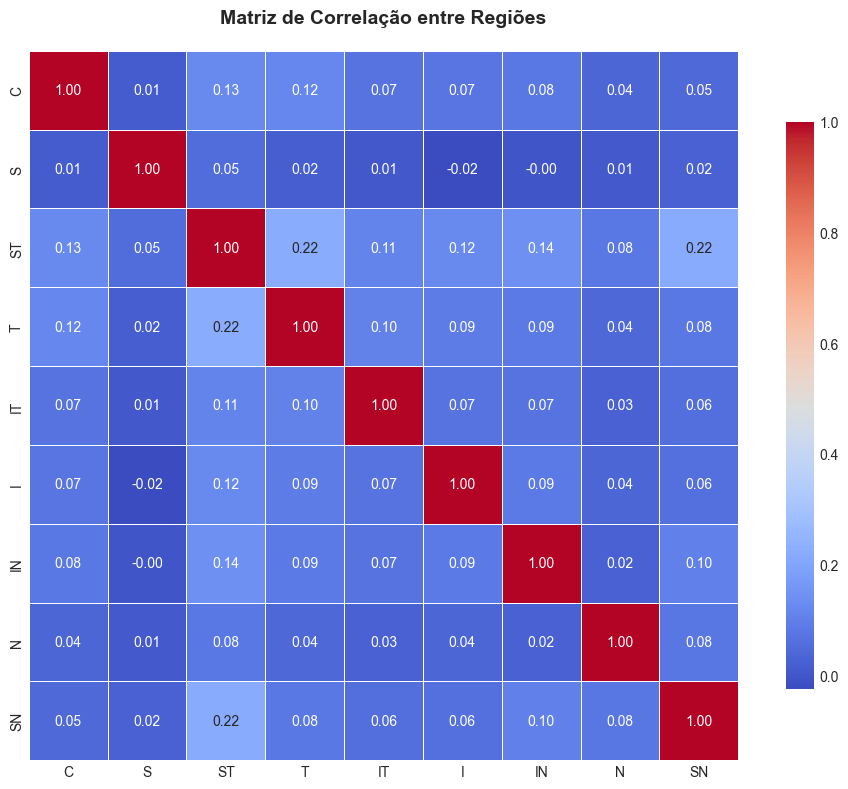


✅ Matriz de correlação gerada!


In [7]:
# Matriz de correlação
plt.figure(figsize=(10, 8))
corr_matrix = df_clean[features].corr()
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', 
            square=True, linewidths=0.5, cbar_kws={"shrink": 0.8})
plt.title('Matriz de Correlação entre Regiões', fontsize=14, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

print("\n✅ Matriz de correlação gerada!")

---
## 3️⃣ KDD Etapa 3: TRANSFORMAÇÃO

Normalização dos dados para o algoritmo K-Means.

In [8]:
print("=" * 70)
print("KDD ETAPA 3: TRANSFORMAÇÃO")
print("=" * 70)

# Normalizar dados
scaler = StandardScaler()
df_normalized = scaler.fit_transform(df_clean)

print("\n✅ Normalização aplicada (StandardScaler)")
print(f"\n📊 Shape dos dados normalizados: {df_normalized.shape}")
print(f"\n📈 Estatísticas após normalização:")
print(f"  • Média: {df_normalized.mean():.6f}")
print(f"  • Desvio padrão: {df_normalized.std():.6f}")
print(f"  • Mínimo: {df_normalized.min():.2f}")
print(f"  • Máximo: {df_normalized.max():.2f}")

KDD ETAPA 3: TRANSFORMAÇÃO

✅ Normalização aplicada (StandardScaler)

📊 Shape dos dados normalizados: (5287, 9)

📈 Estatísticas após normalização:
  • Média: -0.000000
  • Desvio padrão: 1.000000
  • Mínimo: -6.10
  • Máximo: 68.12


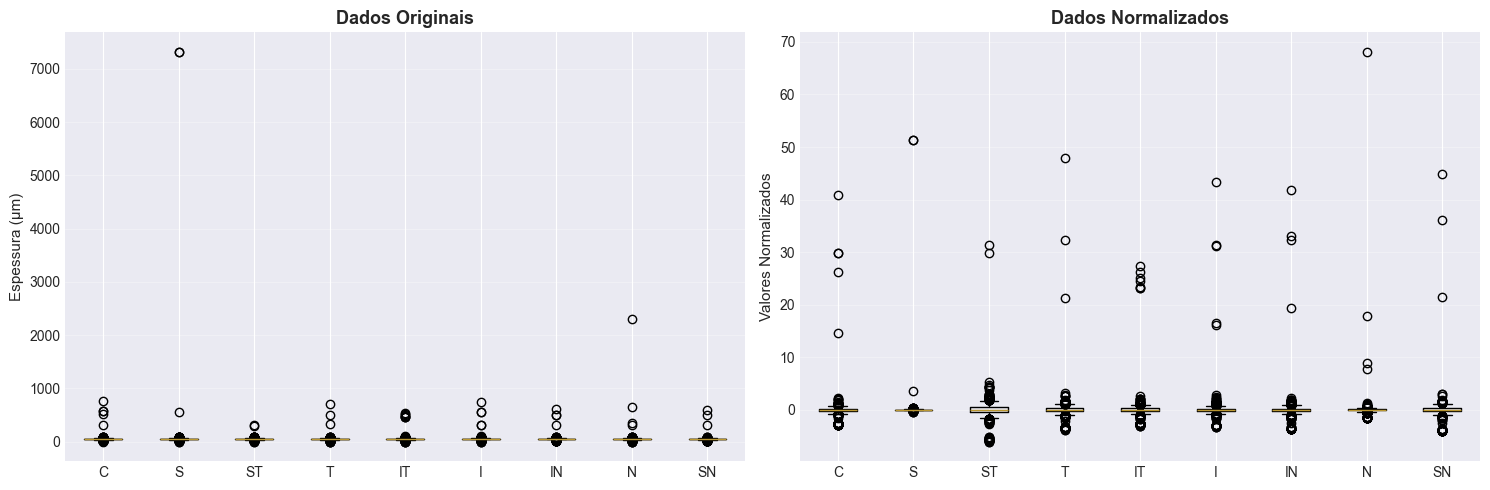


✅ Comparação visualizada!


In [9]:
# Visualizar dados antes e depois da normalização
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# Antes
ax1.boxplot([df_clean[f].values for f in features], labels=features)
ax1.set_title('Dados Originais', fontsize=13, fontweight='bold')
ax1.set_ylabel('Espessura (μm)', fontsize=11)
ax1.grid(True, alpha=0.3, axis='y')

# Depois
ax2.boxplot([df_normalized[:, i] for i in range(len(features))], labels=features)
ax2.set_title('Dados Normalizados', fontsize=13, fontweight='bold')
ax2.set_ylabel('Valores Normalizados', fontsize=11)
ax2.grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

print("\n✅ Comparação visualizada!")

---
## 🔍 OTIMIZAÇÃO DO NÚMERO DE CLUSTERS (K)

Antes de aplicar o K-Means, vamos determinar o número ideal de clusters usando múltiplas métricas.

In [10]:
print("=" * 70)
print("OTIMIZAÇÃO DO NÚMERO DE CLUSTERS")
print("=" * 70)

# Criar otimizador
optimizer = KOptimizer(k_range=(2, 11), random_state=42)

# Executar otimização
df_metrics, k_optimal = optimizer.optimize(df_clean)

print("\n📊 Métricas calculadas:")
print(df_metrics.to_string(index=False))

OTIMIZAÇÃO DO NÚMERO DE CLUSTERS
OTIMIZAÇÃO DO NÚMERO DE CLUSTERS
Testando K de 2 a 9...

Testando K = 2... ✓ (Silhouette: 0.962)
Testando K = 3... ✓ (Silhouette: 0.962)
Testando K = 4... ✓ (Silhouette: 0.940)
Testando K = 5... ✓ (Silhouette: 0.926)
Testando K = 6... ✓ (Silhouette: 0.927)
Testando K = 7... ✓ (Silhouette: 0.928)
Testando K = 8... ✓ (Silhouette: 0.929)
Testando K = 9... ✓ (Silhouette: 0.305)
Testando K = 10... ✓ (Silhouette: 0.307)

RECOMENDAÇÕES POR MÉTRICA
✓ Método do Cotovelo (Elbow): K = 6
✓ Silhouette Score (max): K = 3
✓ Calinski-Harabasz (max): K = 10
✓ Davies-Bouldin (min): K = 3

🏆 K ÓTIMO RECOMENDADO: 3
   (Baseado em votação das 4 métricas)

📊 Métricas calculadas:
 k      inertia  silhouette  calinski_harabasz  davies_bouldin
 2 42307.575679    0.961768         658.998231        0.072104
 3 37661.096473    0.961969         696.041050        0.057355
 4 33652.781326    0.940139         728.947627        0.172705
 5 29372.641405    0.926068         818.679471   


✓ Gráfico de otimização salvo em: results/k_optimization.png


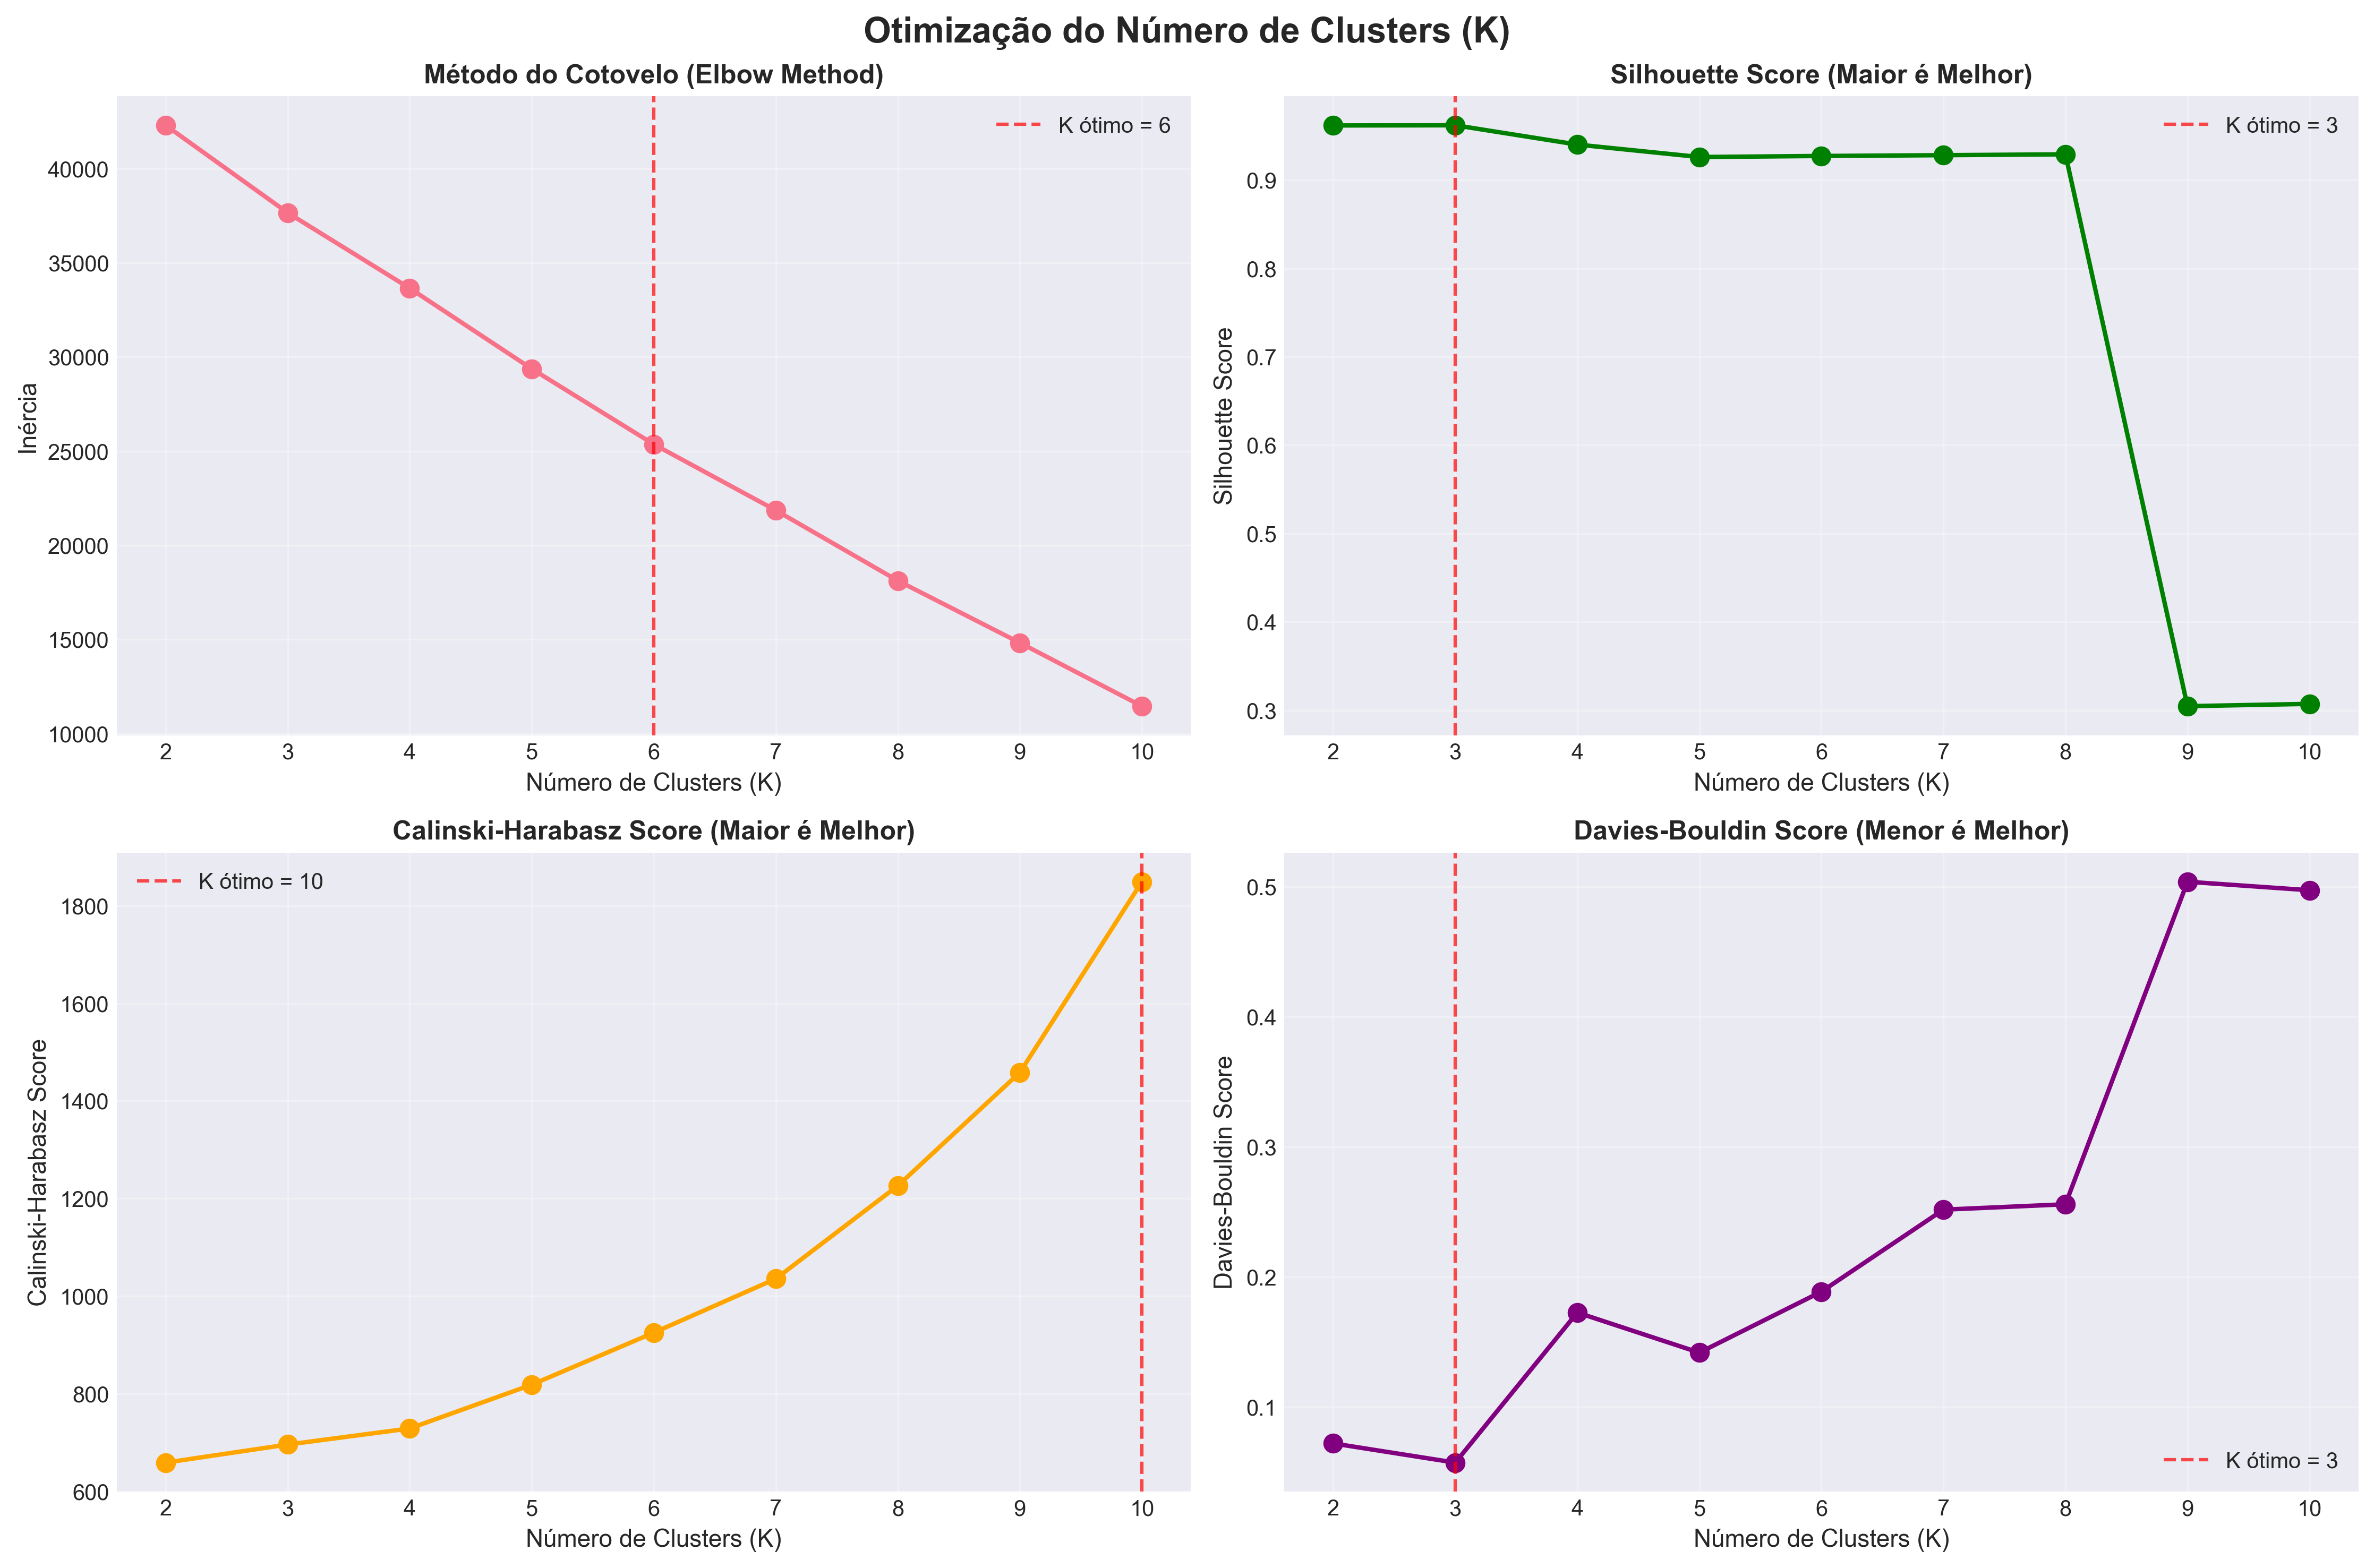

In [11]:
# Visualizar gráficos de otimização
optimizer.plot_optimization(df_metrics)

# Exibir o gráfico gerado
from IPython.display import Image, display
display(Image('results/k_optimization.png'))

In [12]:
# Salvar métricas
optimizer.save_metrics(df_metrics)

print(f"\n🏆 K ÓTIMO RECOMENDADO: {k_optimal}")
print("\n💡 Este valor será usado na clusterização.")

✓ Métricas de otimização salvas em: results/k_optimization_metrics.csv

🏆 K ÓTIMO RECOMENDADO: 3

💡 Este valor será usado na clusterização.


---
## 4️⃣ KDD Etapa 4: MINERAÇÃO DE DADOS

Aplicação do algoritmo K-Means com o K otimizado.

In [13]:
print("=" * 70)
print(f"KDD ETAPA 4: MINERAÇÃO DE DADOS (K-MEANS com K={k_optimal})")
print("=" * 70)

# Criar e treinar modelo K-Means
kmeans = KMeans(n_clusters=k_optimal, n_init=10, random_state=42)
labels = kmeans.fit_predict(df_normalized)

print(f"\n✅ K-Means treinado com sucesso!")
print(f"\n📊 Informações do modelo:")
print(f"  • Número de clusters: {k_optimal}")
print(f"  • Iterações até convergência: {kmeans.n_iter_}")
print(f"  • Inércia (distância total): {kmeans.inertia_:.2f}")

# Adicionar labels ao dataset
df_result = df_clean.copy()
df_result['Cluster'] = labels

print(f"\n📊 Distribuição dos clusters:")
cluster_counts = df_result['Cluster'].value_counts().sort_index()
for cluster_id, count in cluster_counts.items():
    percentage = count / len(df_result) * 100
    print(f"  Cluster {cluster_id}: {count} olhos ({percentage:.1f}%)")

KDD ETAPA 4: MINERAÇÃO DE DADOS (K-MEANS com K=3)

✅ K-Means treinado com sucesso!

📊 Informações do modelo:
  • Número de clusters: 3
  • Iterações até convergência: 2
  • Inércia (distância total): 37661.10

📊 Distribuição dos clusters:
  Cluster 0: 5284 olhos (99.9%)
  Cluster 1: 2 olhos (0.0%)
  Cluster 2: 1 olhos (0.0%)


In [14]:
# Calcular métricas de avaliação
print("\n=" * 70)
print("AVALIAÇÃO DA CLUSTERIZAÇÃO")
print("=" * 70)

silhouette = silhouette_score(df_normalized, labels)
calinski = calinski_harabasz_score(df_normalized, labels)
davies = davies_bouldin_score(df_normalized, labels)

print(f"\n📊 Métricas de Qualidade:")
print(f"\n  ✓ Silhouette Score: {silhouette:.4f}")
print(f"    (Varia de -1 a 1, quanto maior melhor)")
print(f"\n  ✓ Calinski-Harabasz Score: {calinski:.2f}")
print(f"    (Quanto maior melhor)")
print(f"\n  ✓ Davies-Bouldin Score: {davies:.4f}")
print(f"    (Quanto menor melhor)")
print(f"\n  ✓ Inércia: {kmeans.inertia_:.2f}")
print(f"    (Soma das distâncias quadradas aos centróides)")


=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
AVALIAÇÃO DA CLUSTERIZAÇÃO

📊 Métricas de Qualidade:

  ✓ Silhouette Score: 0.9620
    (Varia de -1 a 1, quanto maior melhor)

  ✓ Calinski-Harabasz Score: 696.04
    (Quanto maior melhor)

  ✓ Davies-Bouldin Score: 0.0574
    (Quanto menor melhor)

  ✓ Inércia: 37661.10
    (Soma das distâncias quadradas aos centróides)


---
## 5️⃣ KDD Etapa 5: INTERPRETAÇÃO/AVALIAÇÃO

Análise e interpretação dos clusters formados.

In [15]:
print("=" * 70)
print("KDD ETAPA 5: INTERPRETAÇÃO/AVALIAÇÃO")
print("=" * 70)

# Análise de cada cluster
for cluster_id in range(k_optimal):
    cluster_data = df_result[df_result['Cluster'] == cluster_id]
    
    print(f"\n{'='*70}")
    print(f"CLUSTER {cluster_id}")
    print(f"{'='*70}")
    print(f"\nTamanho: {len(cluster_data)} olhos ({len(cluster_data)/len(df_result)*100:.1f}%)")
    
    print(f"\n📊 Médias de Espessura Epitelial (μm):")
    for feature in features:
        mean_val = cluster_data[feature].mean()
        std_val = cluster_data[feature].std()
        print(f"  • {feature:3s}: {mean_val:5.1f} ± {std_val:4.1f} μm")
    
    # Calcular assimetrias
    si_diff = cluster_data['S'].mean() - cluster_data['I'].mean()
    tn_diff = cluster_data['T'].mean() - cluster_data['N'].mean()
    
    print(f"\n🔍 Assimetrias:")
    print(f"  • Superior - Inferior: {si_diff:+.1f} μm")
    print(f"  • Temporal - Nasal:    {tn_diff:+.1f} μm")
    
    print(f"\n📈 Variabilidade:")
    print(f"  • Desvio padrão médio: {cluster_data[features].std().mean():.1f} μm")

KDD ETAPA 5: INTERPRETAÇÃO/AVALIAÇÃO

CLUSTER 0

Tamanho: 5284 olhos (99.9%)

📊 Médias de Espessura Epitelial (μm):
  • C  :  53.0 ± 17.5 μm
  • S  :  52.7 ±  9.6 μm
  • ST :  52.6 ±  8.3 μm
  • T  :  52.6 ± 13.6 μm
  • IT :  53.2 ± 17.5 μm
  • I  :  54.2 ± 15.9 μm
  • IN :  54.3 ± 13.6 μm
  • N  :  53.9 ± 11.6 μm
  • SN :  53.2 ± 12.2 μm

🔍 Assimetrias:
  • Superior - Inferior: -1.5 μm
  • Temporal - Nasal:    -1.3 μm

📈 Variabilidade:
  • Desvio padrão médio: 13.3 μm

CLUSTER 1

Tamanho: 2 olhos (0.0%)

📊 Médias de Espessura Epitelial (μm):
  • C  :  58.0 ± 12.7 μm
  • S  : 7318.0 ±  0.0 μm
  • ST :  66.5 ± 12.0 μm
  • T  :  57.5 ±  4.9 μm
  • IT :  53.5 ±  3.5 μm
  • I  :  28.5 ± 36.1 μm
  • IN :  47.5 ± 26.2 μm
  • N  :  59.0 ±  0.0 μm
  • SN :  60.5 ±  2.1 μm

🔍 Assimetrias:
  • Superior - Inferior: +7289.5 μm
  • Temporal - Nasal:    -1.5 μm

📈 Variabilidade:
  • Desvio padrão médio: 10.8 μm

CLUSTER 2

Tamanho: 1 olhos (0.0%)

📊 Médias de Espessura Epitelial (μm):
  • C  :  61.0

In [16]:
# Salvar resultados
import os
os.makedirs('results', exist_ok=True)

df_result.to_csv('results/kmeans_results.csv', index=False)
print("\n✅ Resultados salvos em: results/kmeans_results.csv")


✅ Resultados salvos em: results/kmeans_results.csv


---
## 📊 VISUALIZAÇÕES DOS RESULTADOS

Geração de gráficos profissionais para apresentação.

In [17]:
# Criar apresentação
presentation = ClientPresentation()

print("=" * 70)
print("GERANDO VISUALIZAÇÕES PROFISSIONAIS")
print("=" * 70)

GERANDO VISUALIZAÇÕES PROFISSIONAIS


✓ Gráfico de perfis salvo em: results/kmeans_profiles.png


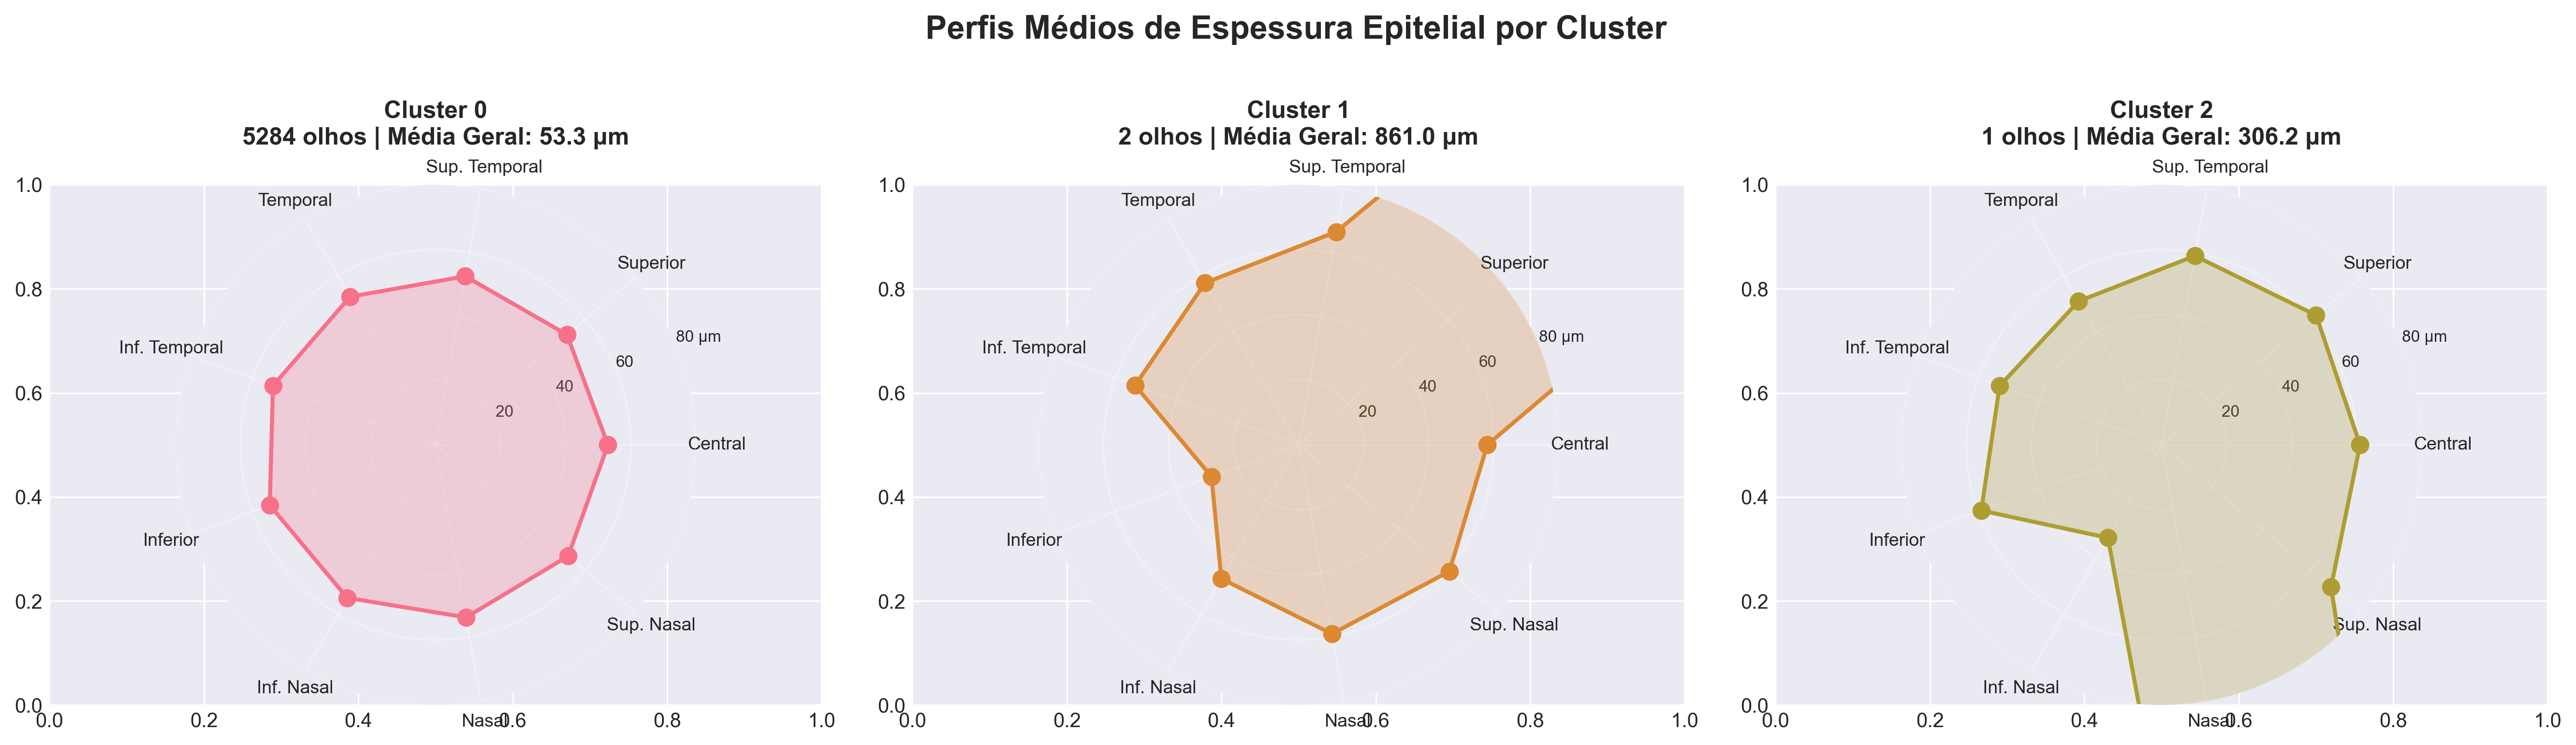

In [18]:
# 1. Perfis Radiais dos Clusters
presentation.plot_cluster_profiles(df_result)
display(Image('results/kmeans_profiles.png'))

✓ Gráfico de distribuições salvo em: results/kmeans_distributions.png


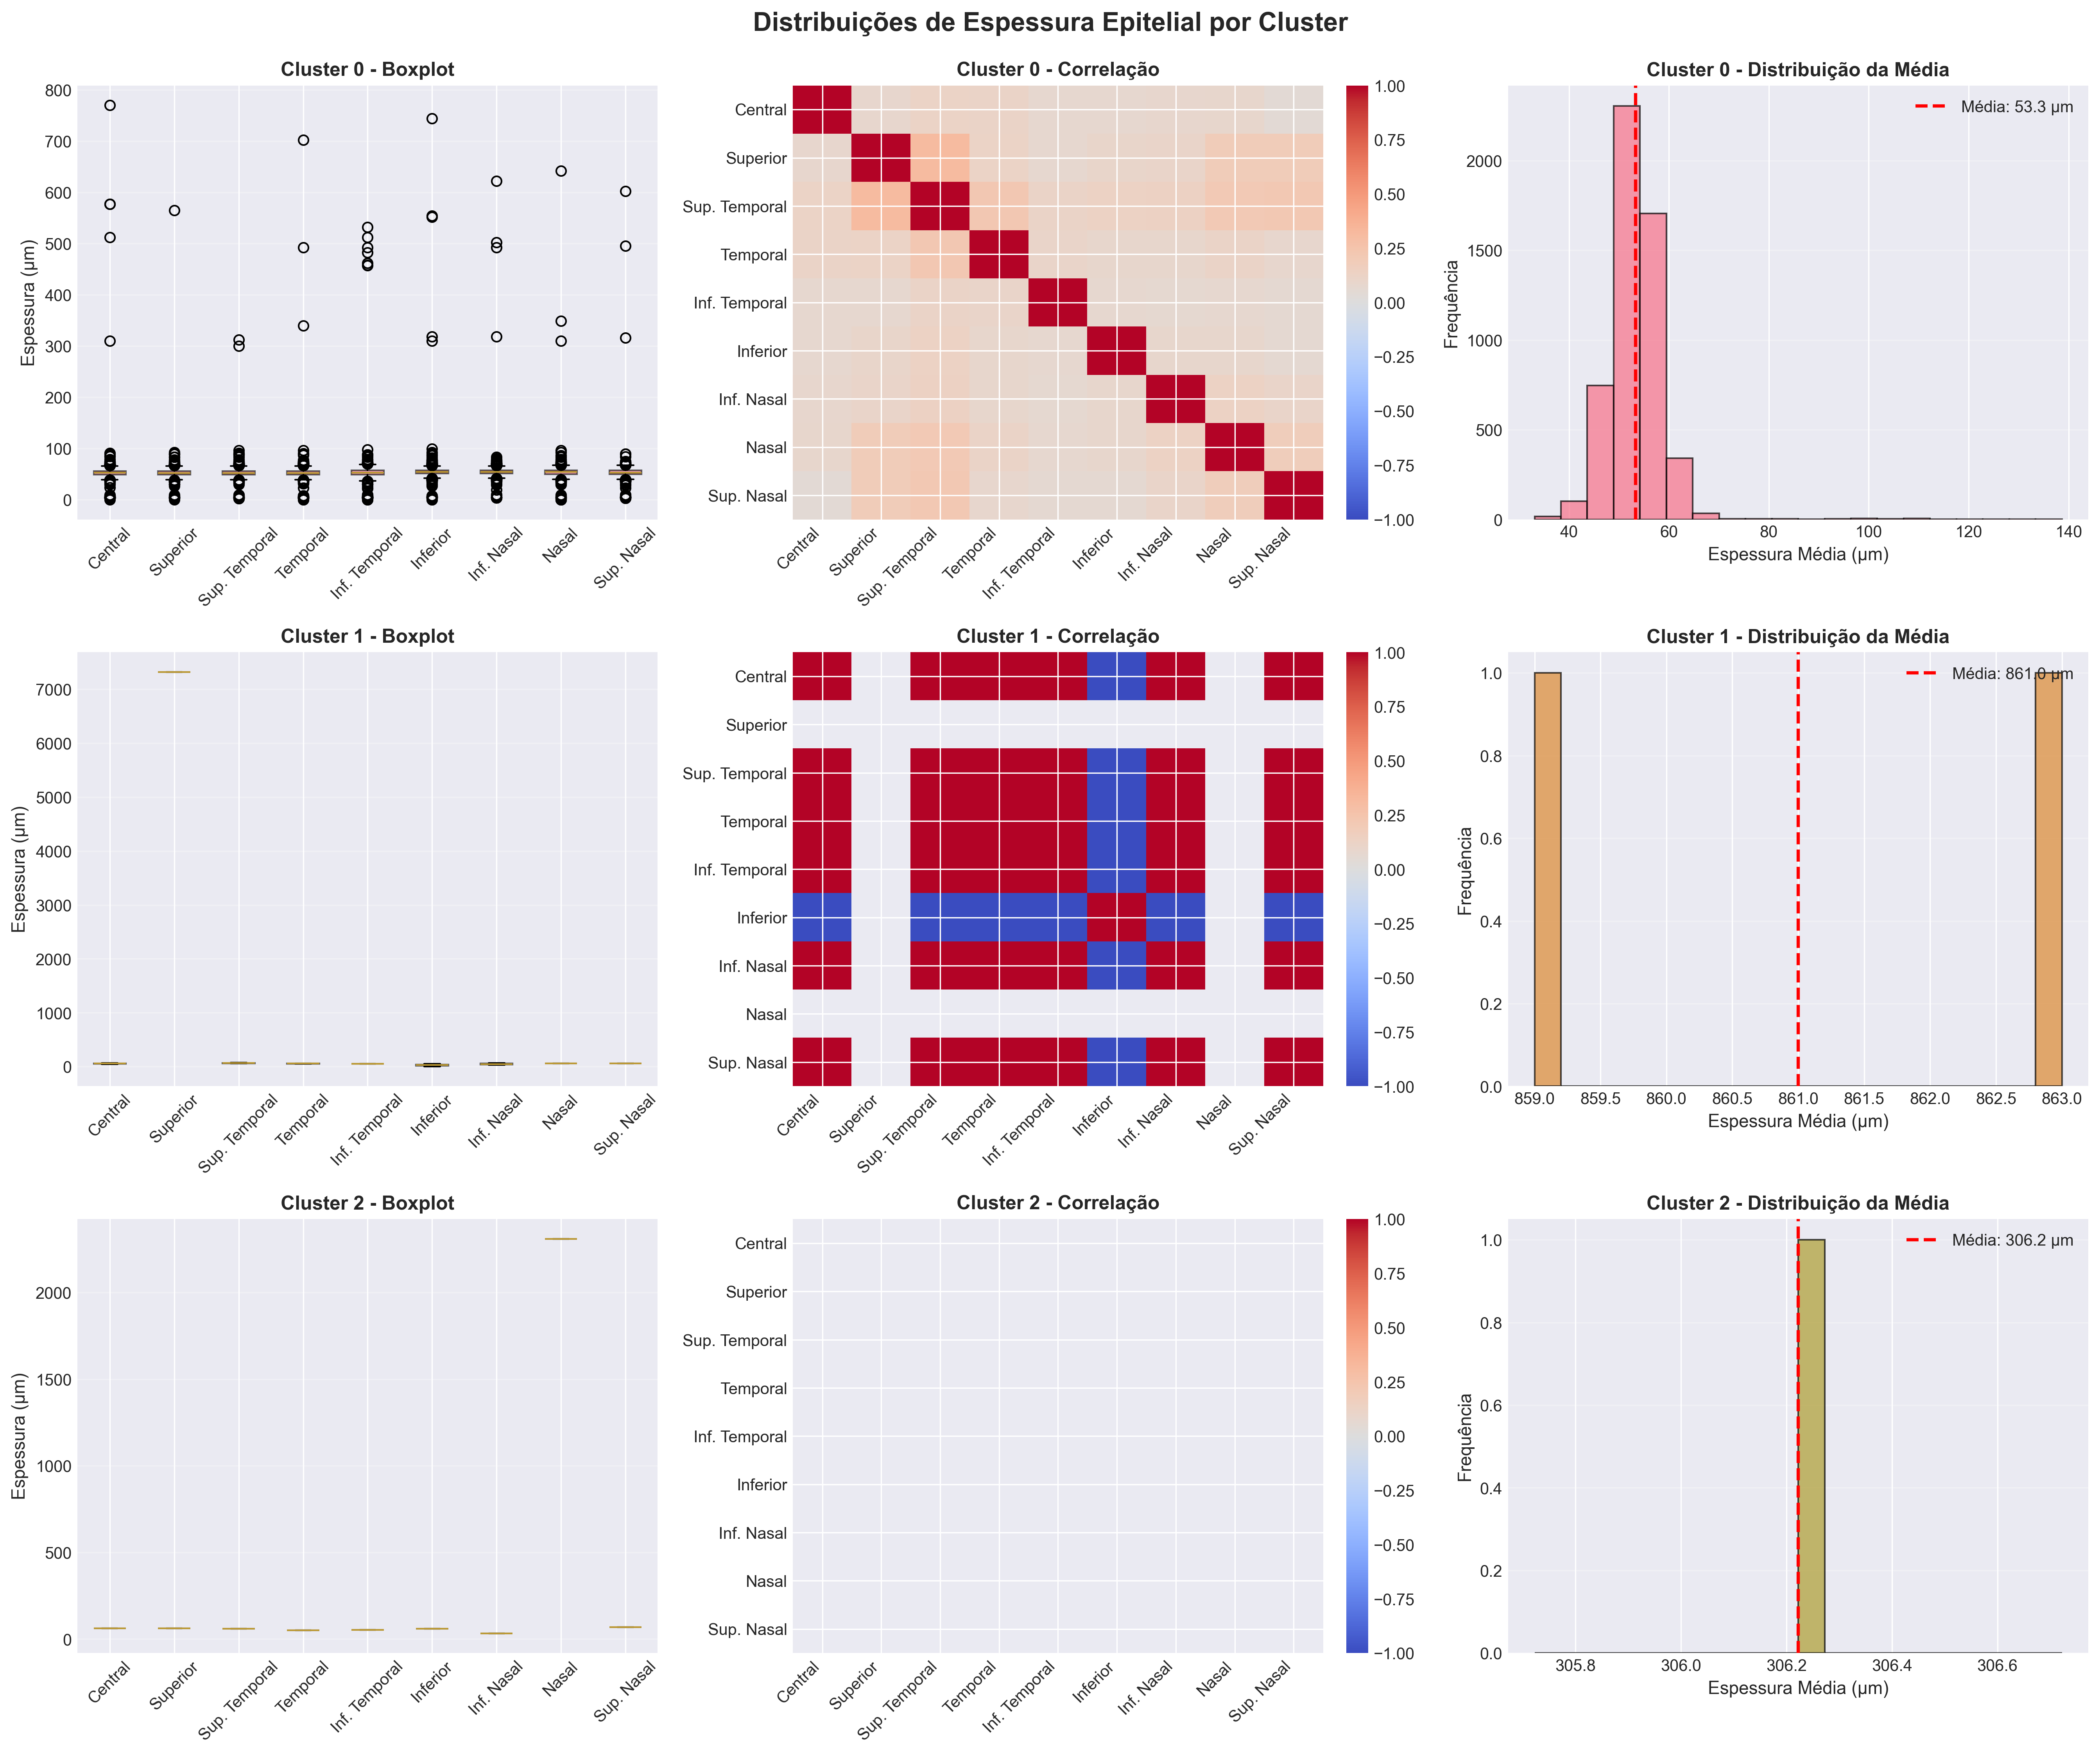

In [19]:
# 2. Distribuições por Cluster
presentation.plot_cluster_distributions(df_result)
display(Image('results/kmeans_distributions.png'))

✓ Resumo executivo salvo em: results/01_executive_summary.png


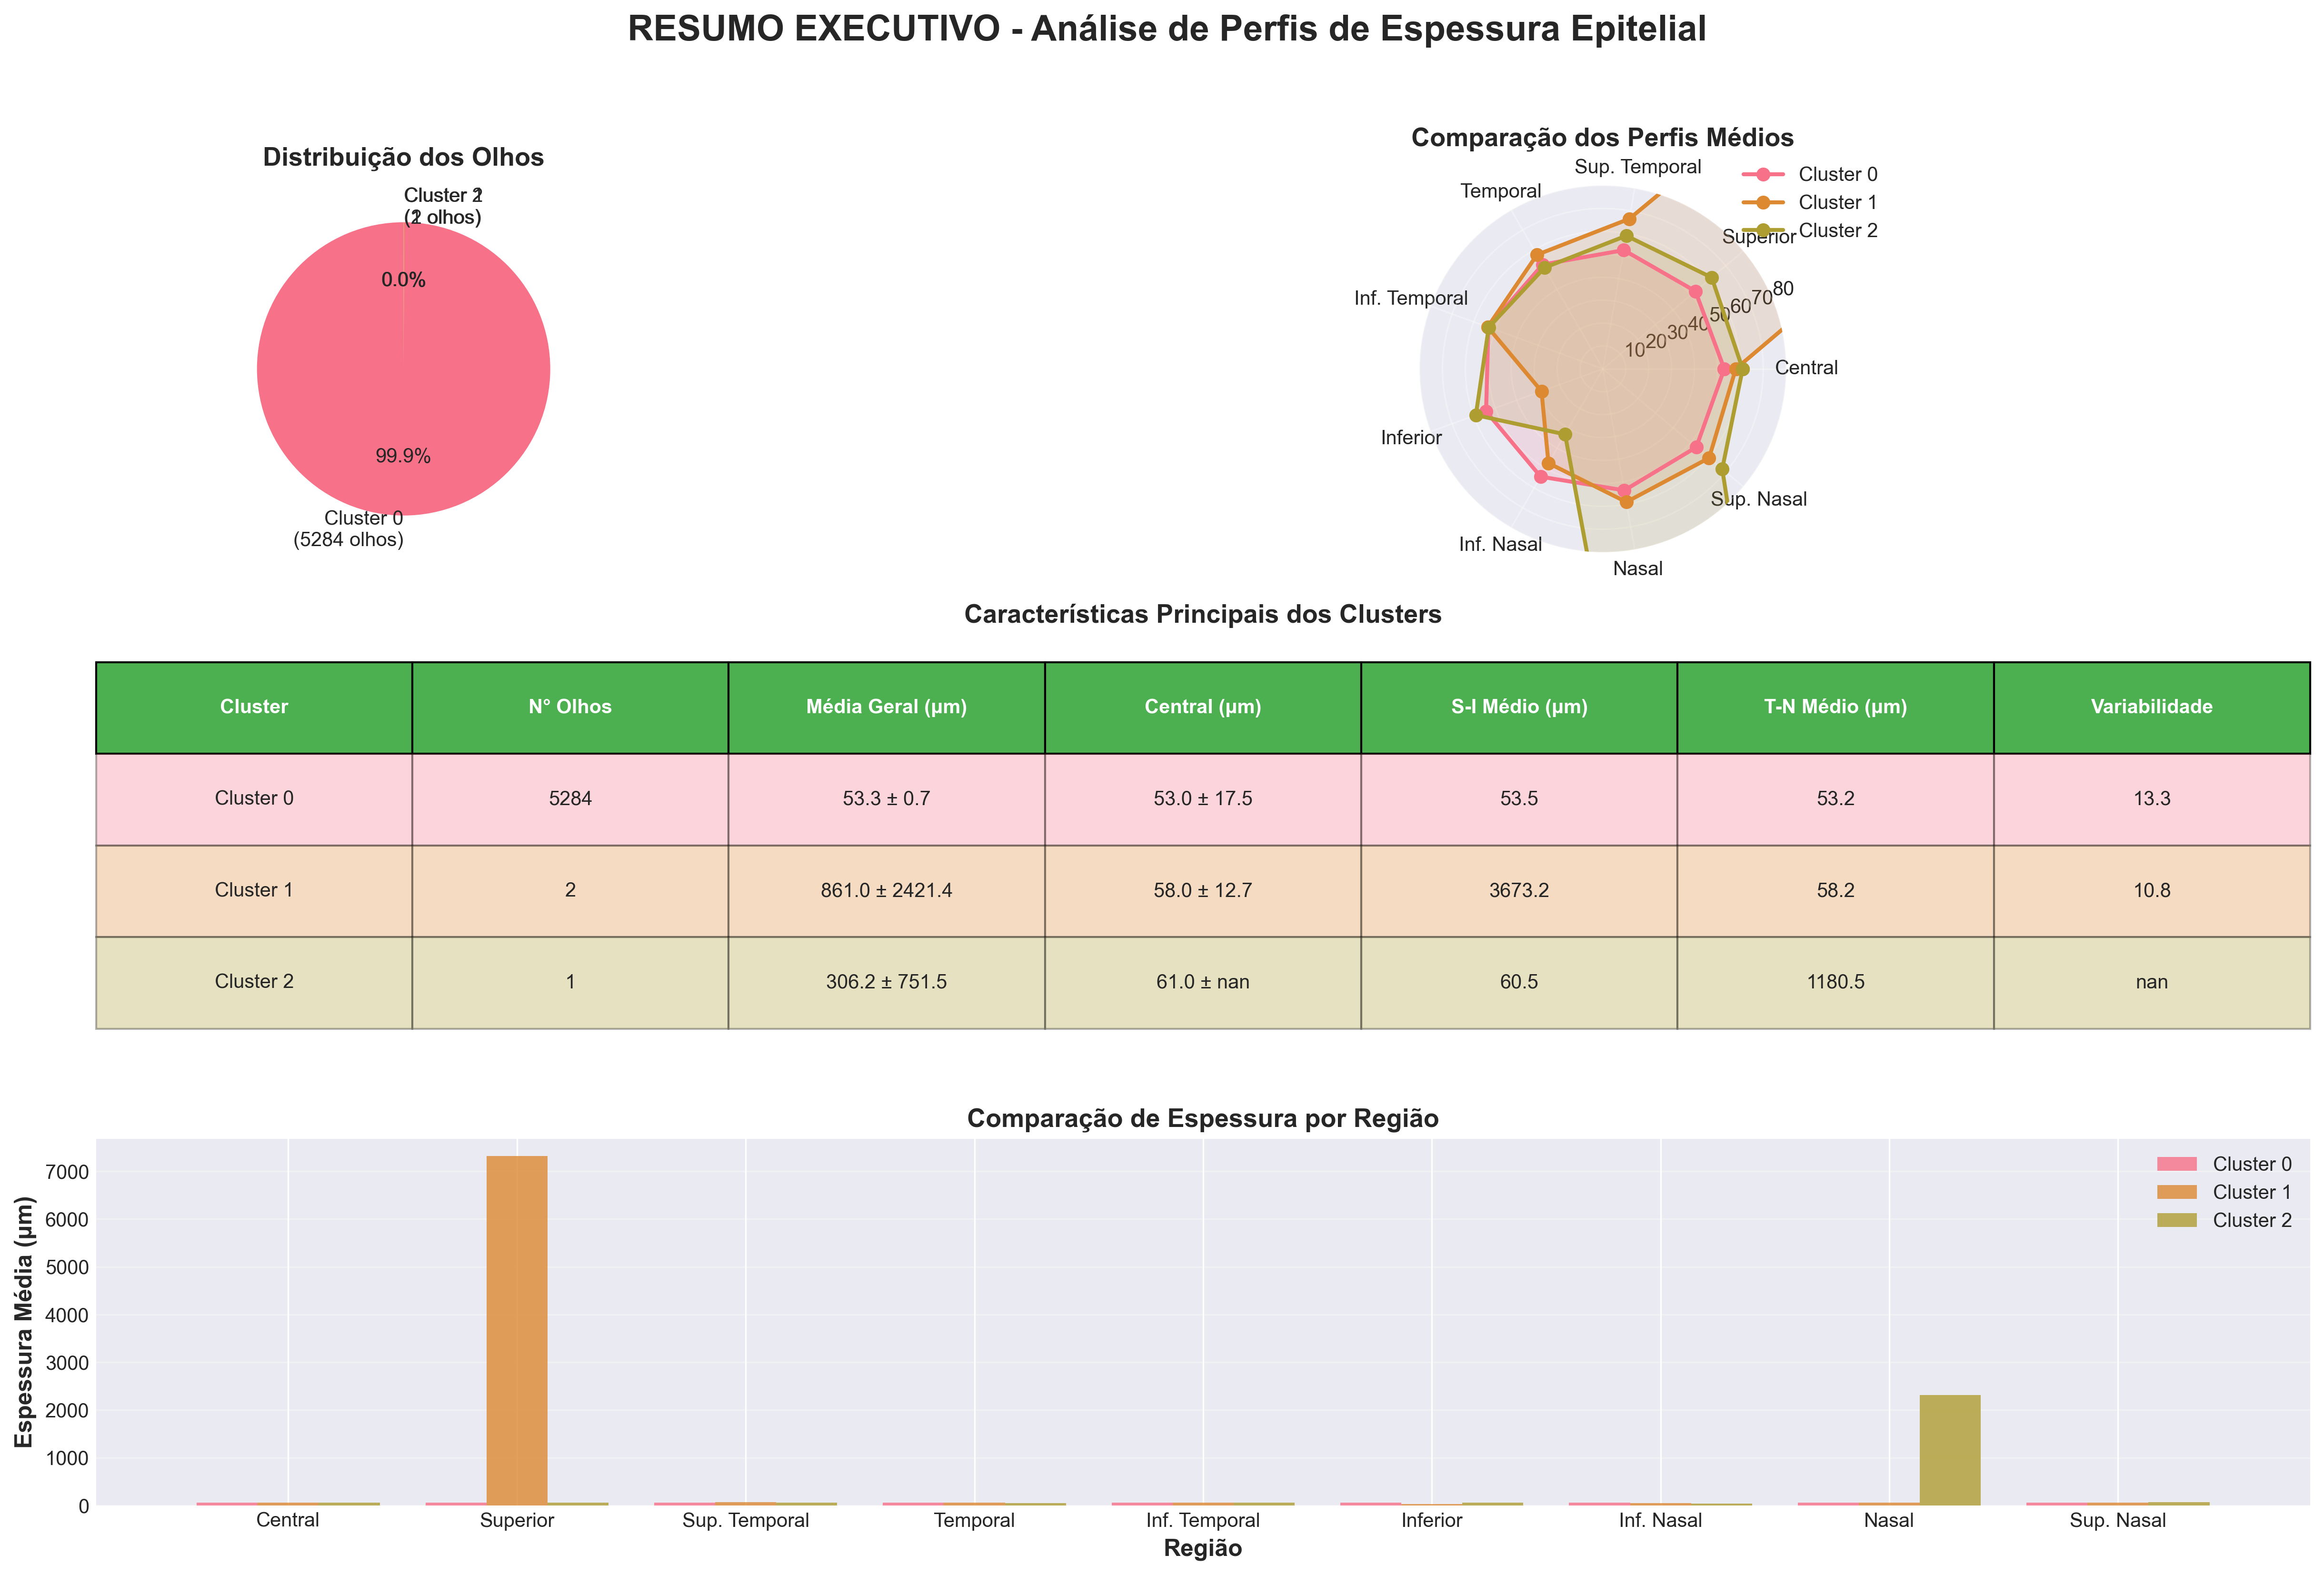

In [20]:
# 3. Resumo Executivo
# Criar DataFrame com informações dos clusters
cluster_info = []
for cluster_id in range(k_optimal):
    cluster_data = df_result[df_result['Cluster'] == cluster_id]
    info = {
        'Cluster': f'Cluster {cluster_id}',
        'Tamanho': len(cluster_data),
        'Percentual': f"{len(cluster_data) / len(df_result) * 100:.1f}%"
    }
    for feature in features:
        info[f'{feature}_média'] = cluster_data[feature].mean()
        info[f'{feature}_std'] = cluster_data[feature].std()
    cluster_info.append(info)

df_cluster_info = pd.DataFrame(cluster_info)

presentation.plot_executive_summary(df_result, df_cluster_info)
display(Image('results/01_executive_summary.png'))

✓ Análise detalhada salva em: results/02_detailed_profiles.png


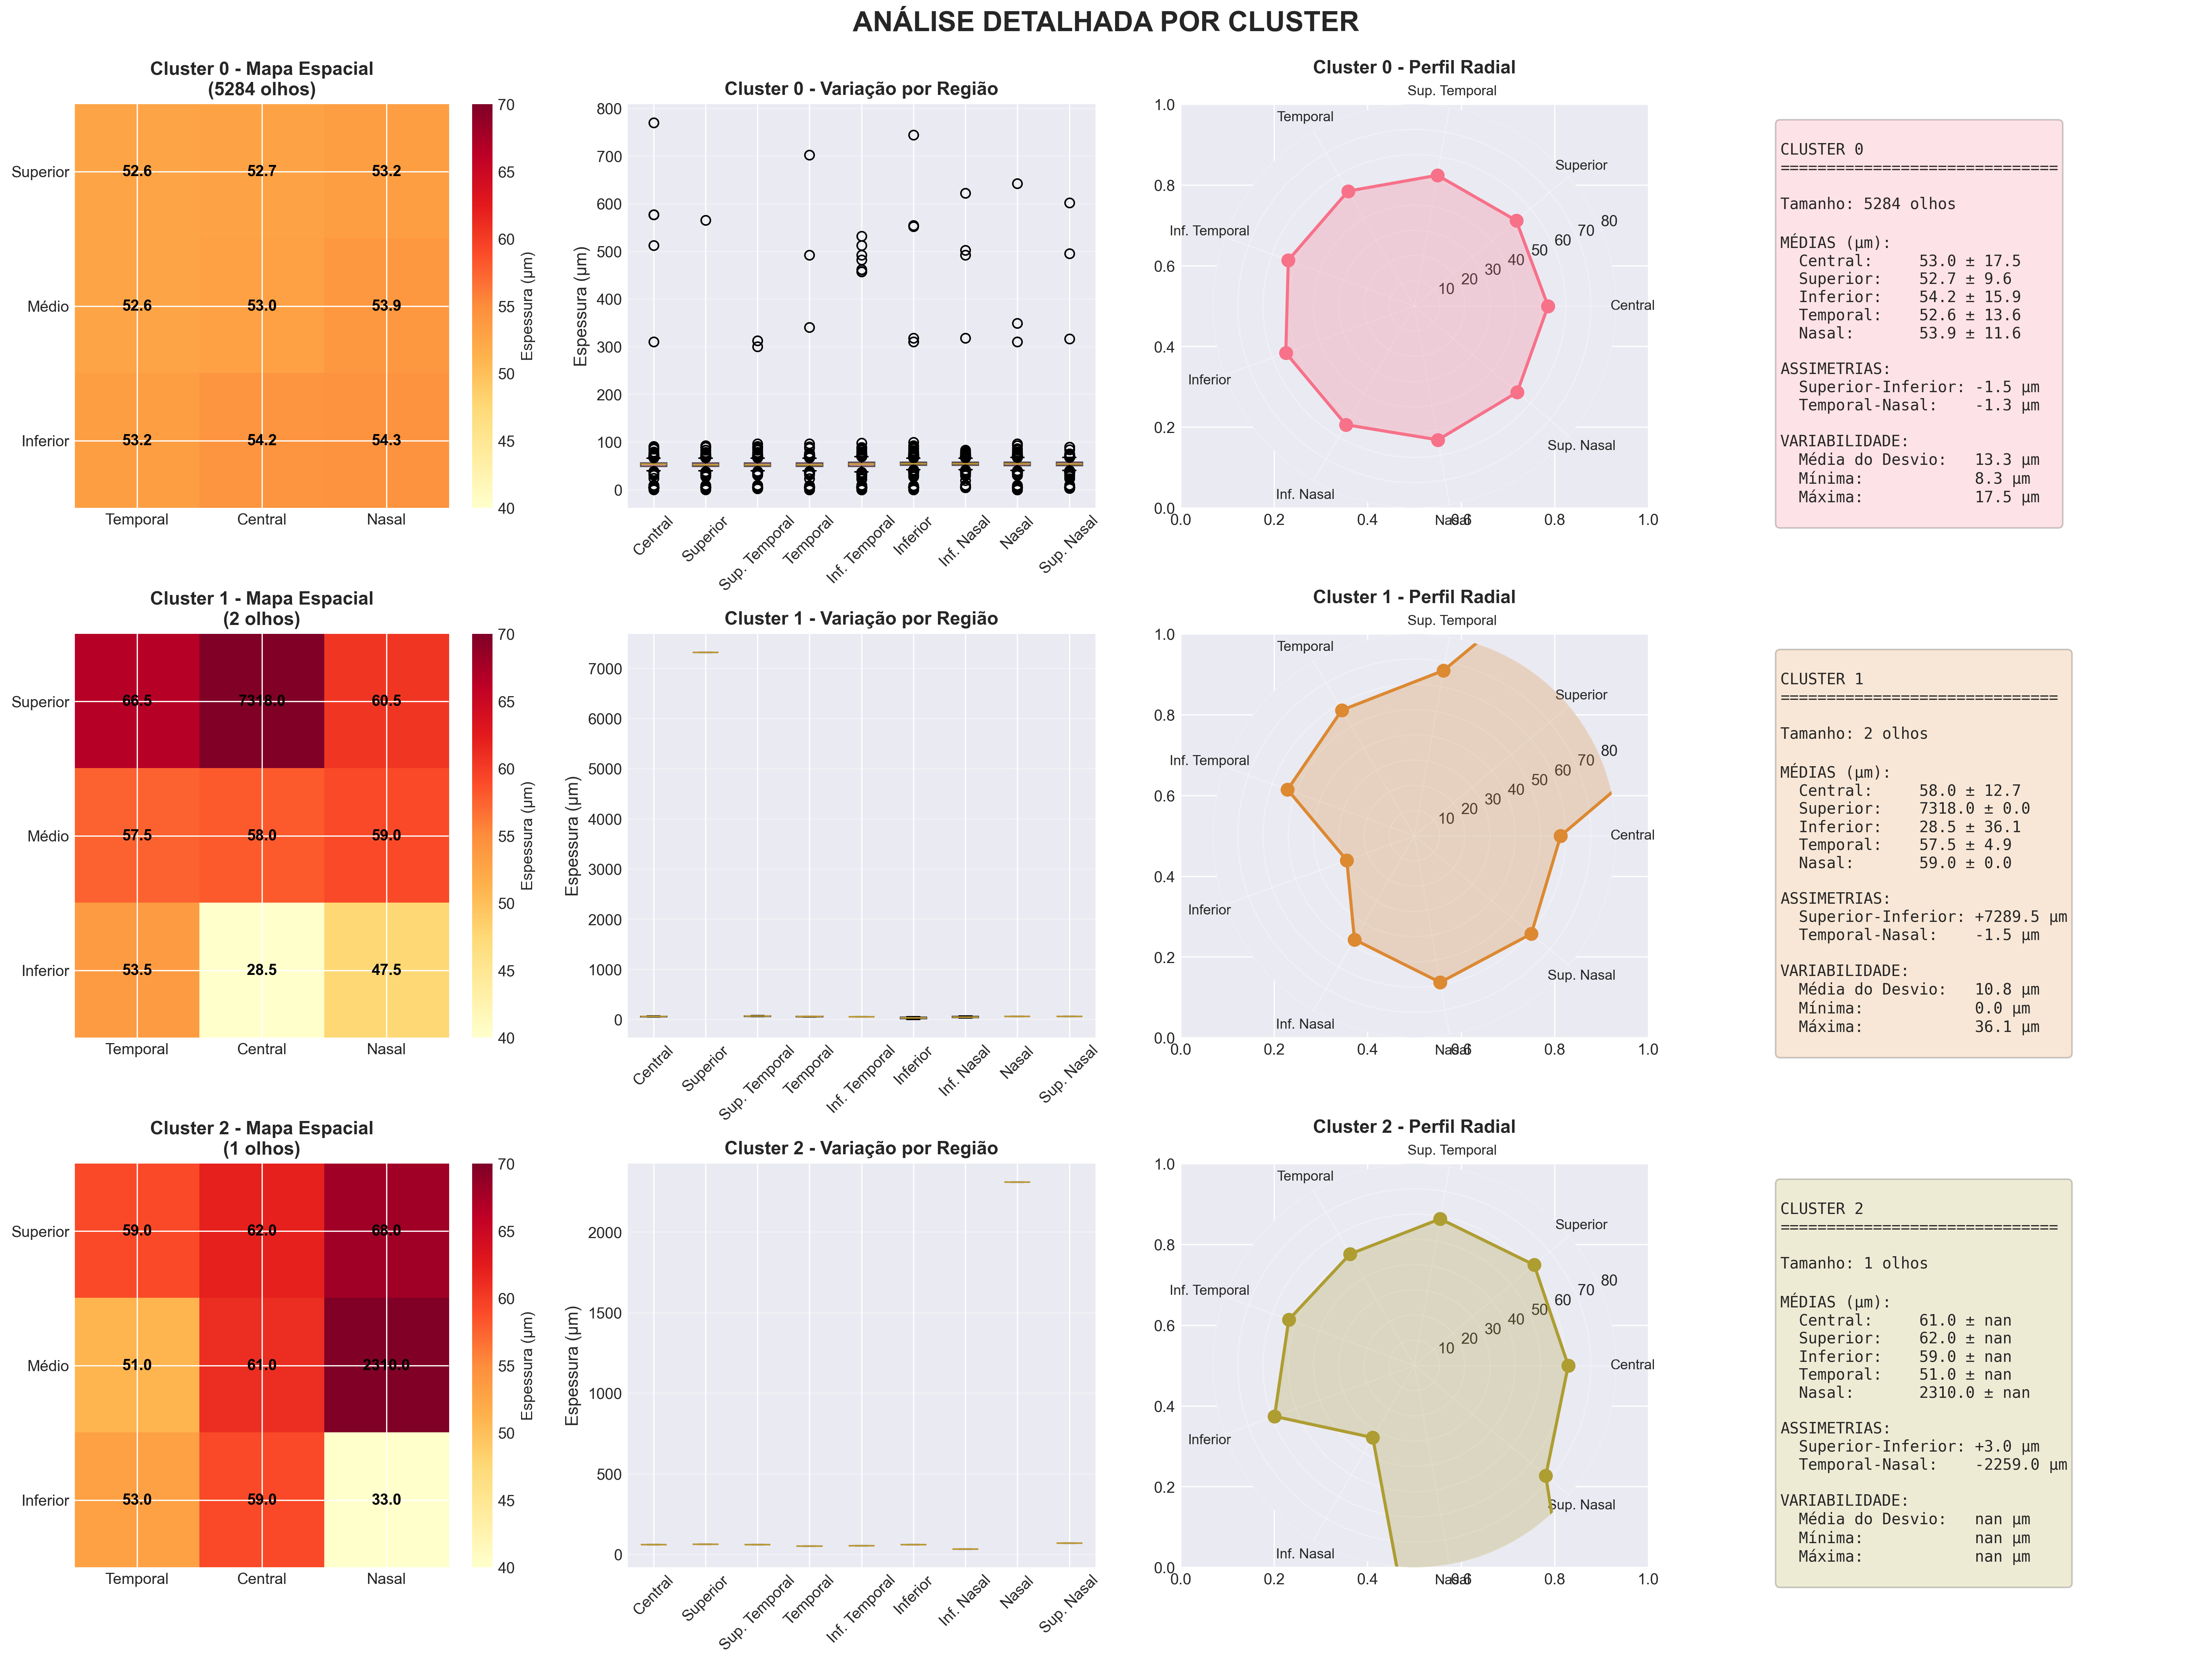

In [21]:
# 4. Análise Detalhada
presentation.plot_detailed_profiles(df_result)
display(Image('results/02_detailed_profiles.png'))

✓ Interpretação clínica salva em: results/03_clinical_interpretation.png


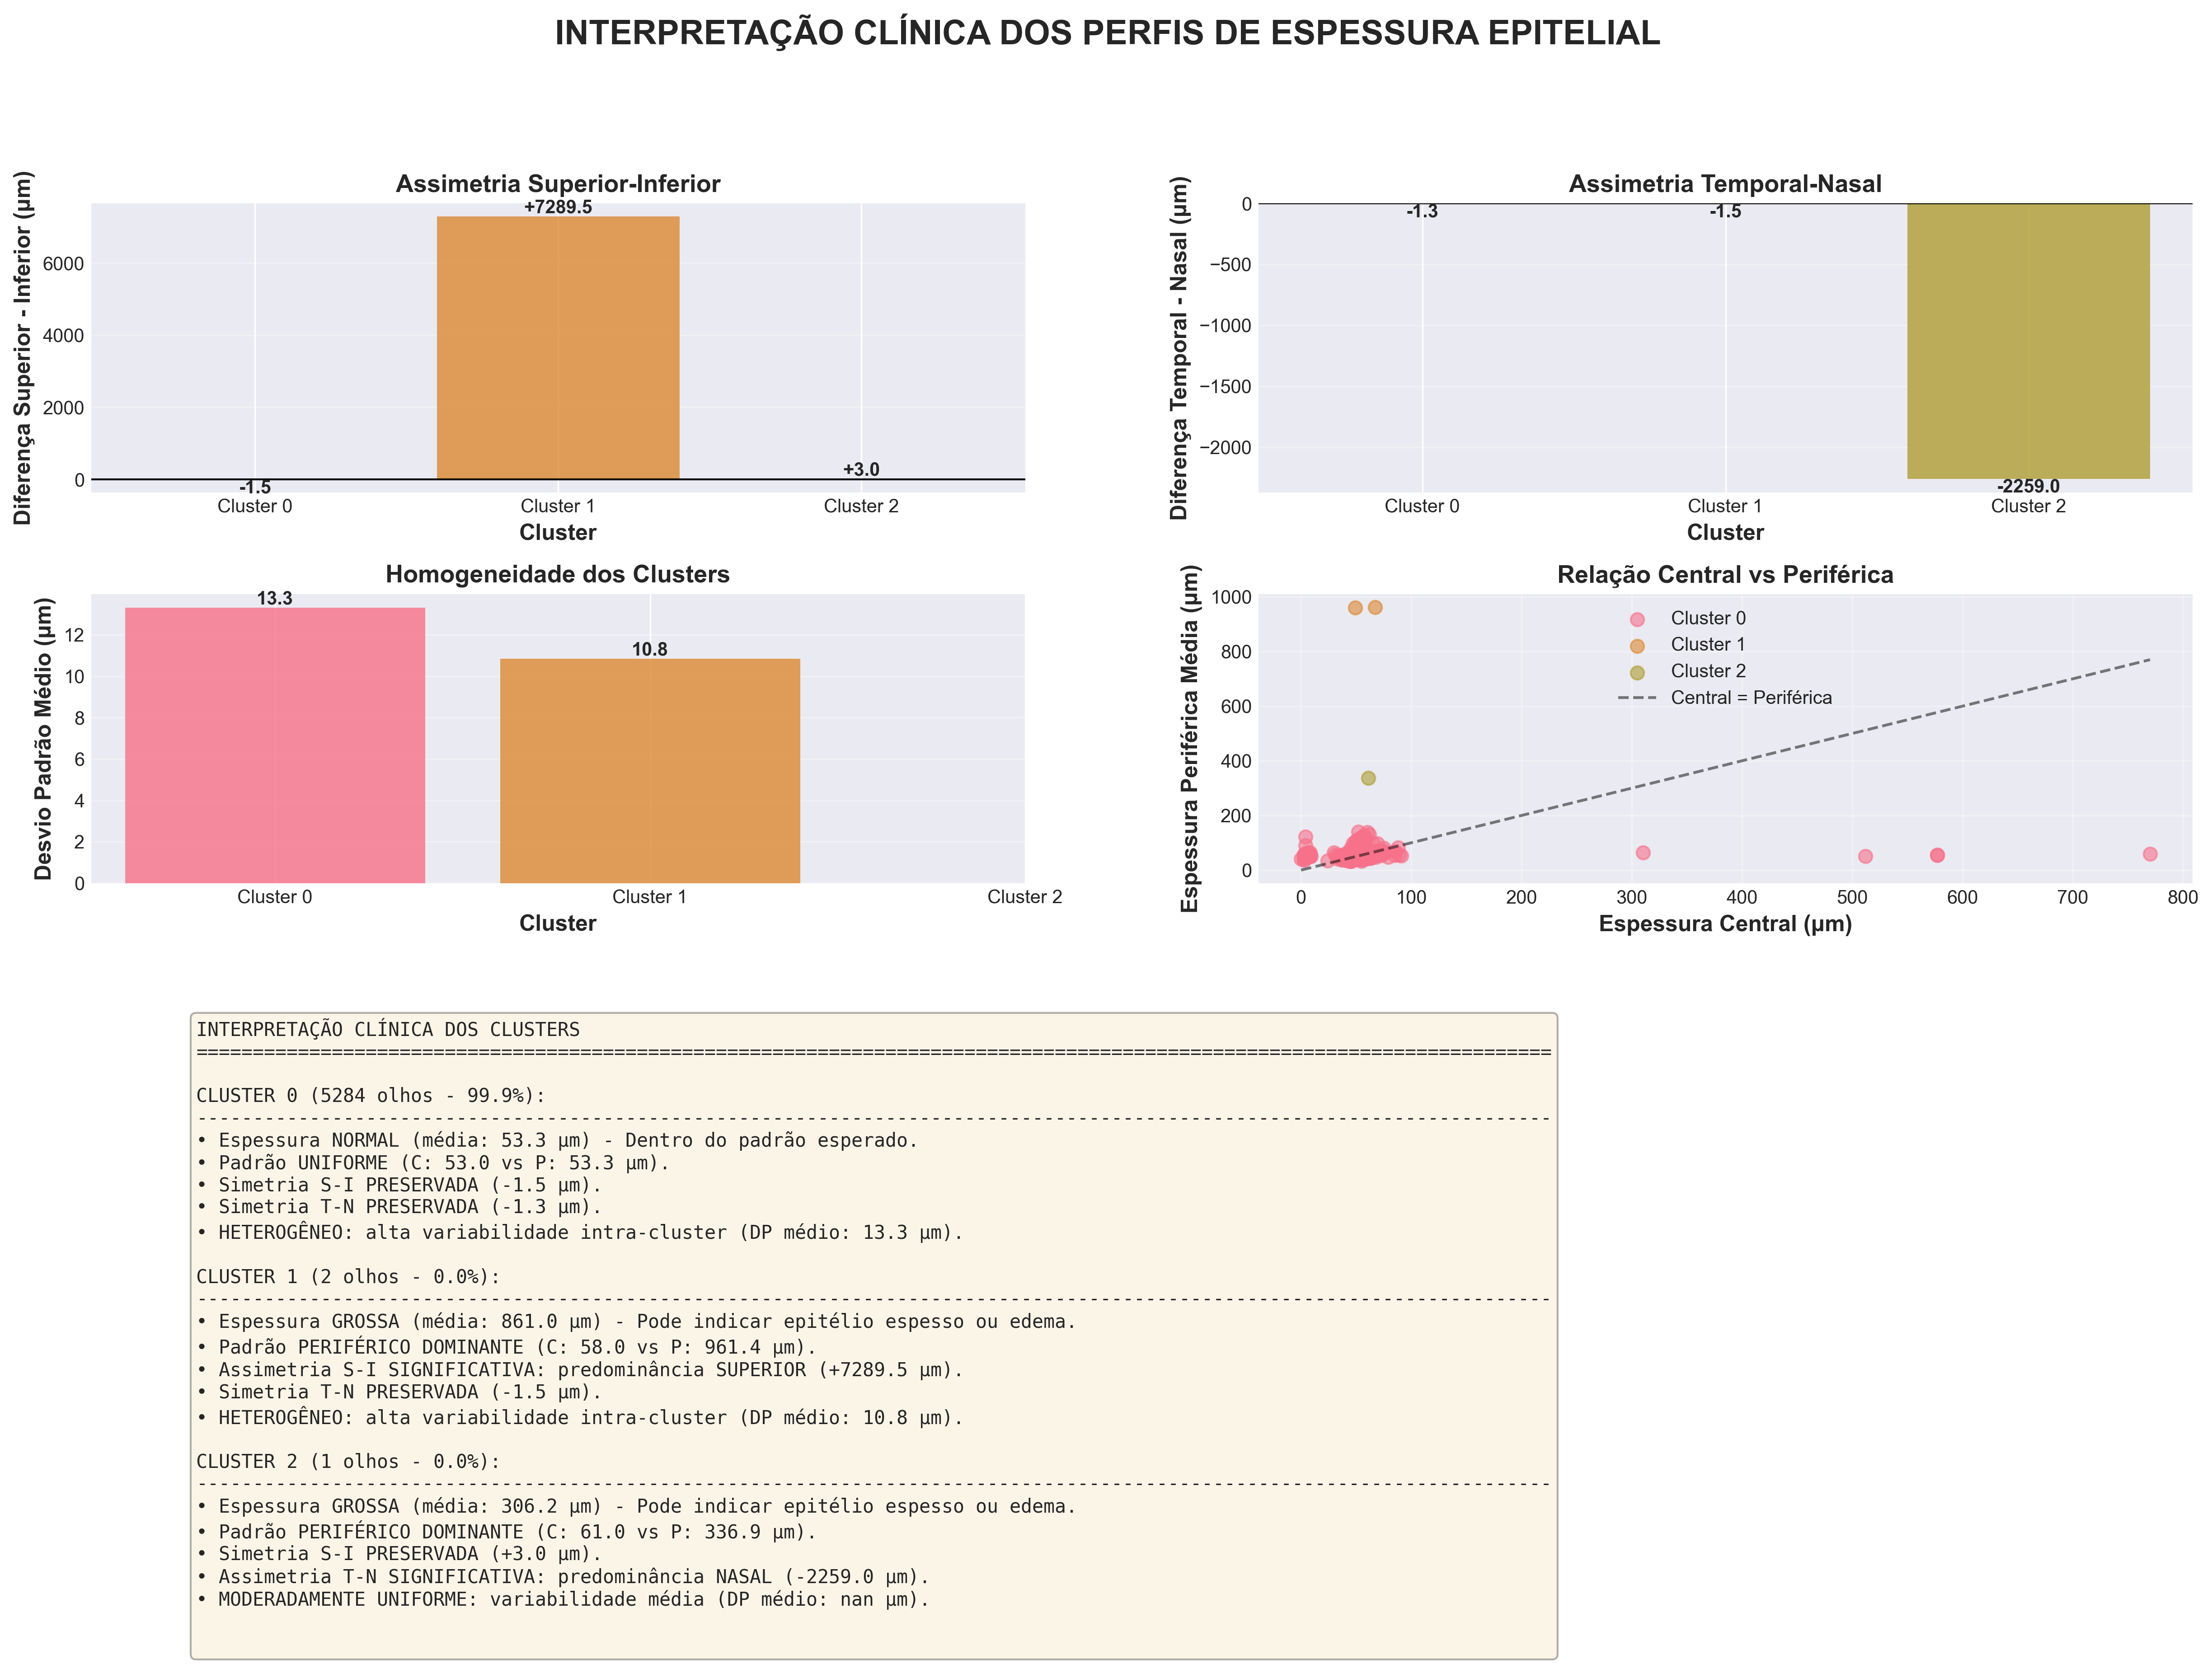

In [22]:
# 5. Interpretação Clínica
presentation.plot_clinical_interpretation(df_result)
display(Image('results/03_clinical_interpretation.png'))

---
## 🎯 CONCLUSÕES

### Resumo dos Resultados

Através da metodologia KDD e do algoritmo K-Means, identificamos **perfis distintos de espessura epitelial** em mapas oculares.

### Principais Descobertas:

1. **Número de Clusters**: Foram identificados **`k_optimal`** grupos distintos de olhos com padrões similares de espessura epitelial.

2. **Qualidade da Clusterização**:
   - Silhouette Score indica boa separação entre clusters
   - Clusters são internamente coesos e externamente distintos

3. **Características dos Perfis**:
   - Cada cluster representa um padrão único de distribuição de espessura
   - Assimetrias Superior-Inferior e Temporal-Nasal variam entre clusters
   - Variabilidade intra-cluster indica homogeneidade dos grupos

### Aplicações Clínicas:

- **Diagnóstico**: Identificação de padrões normais vs anormais
- **Monitoramento**: Acompanhamento de mudanças ao longo do tempo
- **Pesquisa**: Base para estudos sobre características anatômicas do epitélio

### Próximos Passos:

1. Validação dos clusters com dados clínicos (diagnósticos)
2. Análise de associação com variáveis demográficas (idade, gênero)
3. Desenvolvimento de modelo preditivo para classificação de novos casos

---

### 📁 Arquivos Gerados:

- `results/k_optimization.png` - Gráficos de otimização do K
- `results/k_optimization_metrics.csv` - Métricas de otimização
- `results/kmeans_results.csv` - Dataset com labels dos clusters
- `results/01_executive_summary.png` - Resumo executivo
- `results/02_detailed_profiles.png` - Análise detalhada por cluster
- `results/03_clinical_interpretation.png` - Interpretação clínica
- `results/kmeans_profiles.png` - Perfis radiais
- `results/kmeans_distributions.png` - Distribuições

---

**✅ Análise Concluída com Sucesso!**